# 1. Importar librerias

In [53]:
import pandas as pd
from kagglehub import dataset_download
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# 2. Esta operación descarga el dataset de Kaggle.
> Puede tardar unos minutos si el dataset no estaba descargado anteriormente.

> Archivos descargados: 8.3 GB aproximadamente (33 Millones de registros aproximadamente). 

In [2]:
path = dataset_download("dasgroup/rba-dataset")
print(path)

C:\Users\carlo\.cache\kagglehub\datasets\dasgroup\rba-dataset\versions\1


# 3. Leer el dataset
> Puede tardar unos minutos.

> Ajustar `nrows` si es necesario, tomar menos registros si el equipo no tiene suficientes recursos.

In [3]:
df = pd.read_csv(f"{path}/rba-dataset.csv", nrows=500000)

In [4]:
df.head()

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     500000 non-null  int64  
 1   Login Timestamp           500000 non-null  object 
 2   User ID                   500000 non-null  int64  
 3   Round-Trip Time [ms]      22267 non-null   float64
 4   IP Address                500000 non-null  object 
 5   Country                   500000 non-null  object 
 6   Region                    499692 non-null  object 
 7   City                      499809 non-null  object 
 8   ASN                       500000 non-null  int64  
 9   User Agent String         500000 non-null  object 
 10  Browser Name and Version  500000 non-null  object 
 11  OS Name and Version       500000 non-null  object 
 12  Device Type               499976 non-null  object 
 13  Login Successful          500000 non-null  b

In [6]:
df.shape

(500000, 16)

In [7]:
df[df['Is Account Takeover'] == True]

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
82873,82873,2020-02-04 13:45:50.280,5519106287451092780,NaN,10.4.1.162,IT,Provincia di Treviso,Treviso,503109,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,False,True
82947,82947,2020-02-04 13:46:45.241,-7654599524478640403,NaN,10.4.1.162,IT,Provincia di Treviso,Treviso,503109,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,False,True
100085,100085,2020-02-04 17:15:42.743,-6380256063165146454,NaN,31.131.16.24,RO,-,-,56851,Mozilla/5.0 (X11; CrOS armv7l 5978.98.0) Appl...,Chrome 71.0.3578.40.50,Chrome OS 5978.98.0,desktop,True,True,True
202905,202905,2020-02-06 05:19:28.841,4130074439166519892,NaN,185.170.136.4,IT,Veneto,Sospirolo,206801,Mozilla/5.0 (iPad; CPU OS 8_2 like Mac OS X) ...,Android 2.3.6,iOS 8.2,mobile,True,False,True
273968,273968,2020-02-07 01:25:57.399,-136955930917892295,NaN,10.0.85.13,NO,Vestland,Vassenden,197475,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.203,Mac OS X 10.14.6,desktop,True,False,True
482034,482034,2020-02-10 05:51:00.938,-5783801028078876142,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
482102,482102,2020-02-10 05:52:45.031,6969491805167028251,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
482456,482456,2020-02-10 06:01:54.380,-2200491188712463133,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
482566,482566,2020-02-10 06:05:11.464,5780471454460598558,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
483111,483111,2020-02-10 06:17:40.877,-4181075837585773799,NaN,91.240.236.235,RO,Ilfov,Petrachioaia,62350,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True


In [8]:
df[df['Is Account Takeover'] == False]

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,2020-02-10 10:25:27.201,1789057306172076991,NaN,91.219.112.64,PL,Lesser Poland,Krakow,51792,Mozilla/5.0 (Linux; Android 5.5.1; CHM-U01) A...,Chrome Mobile 71.0.3578.2896.2903,Android 5.5.1,mobile,False,False,False
499996,499996,2020-02-10 10:25:27.219,-4324475583306591935,NaN,185.19.118.49,PL,Łódź Voivodeship,Reczno,49528,Mozilla/5.0 (iPhone; CPU iPhone OS 14_2_1 lik...,Firefox 20.0.0.1689,iOS 14.2.1,mobile,False,False,False
499997,499997,2020-02-10 10:25:28.764,-1092758265185202105,NaN,10.3.167.200,NO,Oslo County,Oslo,500202,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_...,Chrome 90.0.4411,Mac OS X 10.14.6,desktop,True,False,False
499998,499998,2020-02-10 10:25:30.099,-4324475583306591935,NaN,91.186.8.58,GB,-,-,29550,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,True,False


# 4. Limpiar el dataset

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Round-Trip Time [ms]        477733
Region                         308
City                           191
Device Type                     24
User ID                          0
Login Timestamp                  0
Country                          0
index                            0
IP Address                       0
ASN                              0
Browser Name and Version         0
User Agent String                0
OS Name and Version              0
Login Successful                 0
Is Attack IP                     0
Is Account Takeover              0
dtype: int64

In [11]:
category_cols = df.select_dtypes(include=["object"]).columns

In [12]:
category_cols

Index(['Login Timestamp', 'IP Address', 'Country', 'Region', 'City',
       'User Agent String', 'Browser Name and Version', 'OS Name and Version',
       'Device Type'],
      dtype='object')

In [13]:
for col in category_cols:
    if df[col].nunique() <= 10:
        print(f"{col}: {df[col].unique()}")

Device Type: ['mobile' 'desktop' 'tablet' 'bot' 'unknown' nan]


In [14]:
df_clean = df.drop(columns=['User ID', 'User Agent String', 'Browser Name and Version', 'OS Name and Version',
                            'Round-Trip Time [ms]', 'ASN', "Login Timestamp", "IP Address"])

In [15]:
df_clean['Region'] = df_clean['Region'].replace('-', 'Unknown')
df_clean['Region'] = df_clean['Region'].fillna('Unknown')

df_clean['City'] = df_clean['City'].replace('-', 'Unknown')
df_clean['City'] = df_clean['City'].fillna('Unknown')

df_clean['Device Type'] = df_clean['Device Type'].fillna('unknown')

In [16]:
df_clean.isnull().sum().sort_values(ascending=False)

index                  0
Country                0
Region                 0
City                   0
Device Type            0
Login Successful       0
Is Attack IP           0
Is Account Takeover    0
dtype: int64

In [17]:
df_clean.shape

(500000, 8)

In [18]:
df_clean.head()

,index,Country,Region,City,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,NO,Unknown,Unknown,mobile,False,False,False
1,1,AU,Unknown,Unknown,mobile,False,False,False
2,2,NO,Vestland,Urangsvag,mobile,True,False,False
3,3,US,Unknown,Unknown,mobile,False,False,False
4,4,US,Virginia,Ashburn,mobile,False,True,False


In [19]:
df = df_clean

# 5. Análisis exploratorio de datos (EDA)

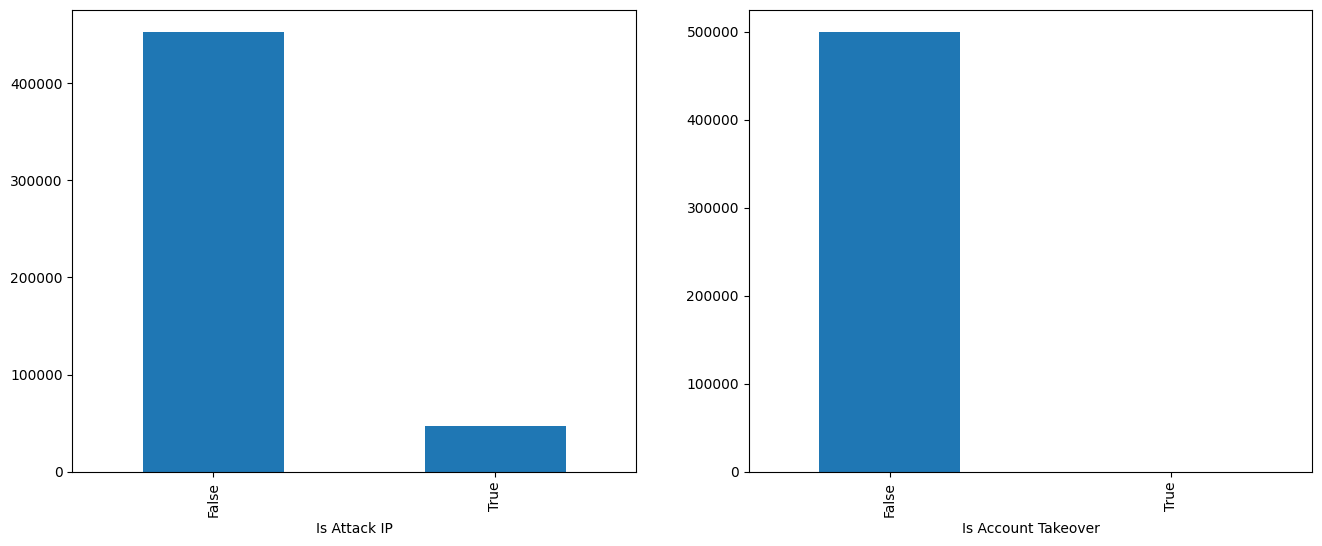

In [20]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
df['Is Attack IP'].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
df['Is Account Takeover'].value_counts().plot(kind='bar')

plt.show()

<Axes: xlabel='Login Successful'>

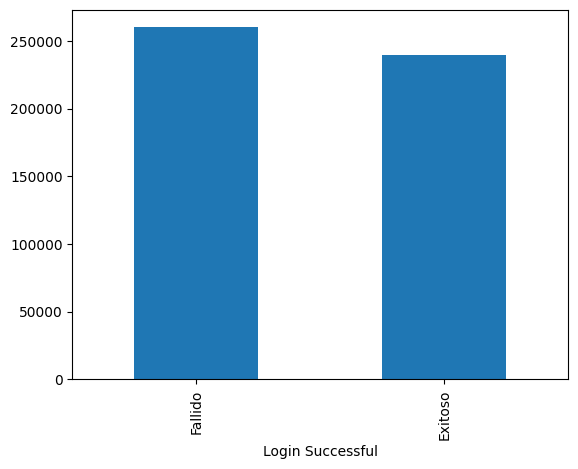

In [21]:
serie = df['Login Successful'].map({True: 'Exitoso', False: 'Fallido'}).fillna('Desconocido')
serie.value_counts().plot(kind='bar')

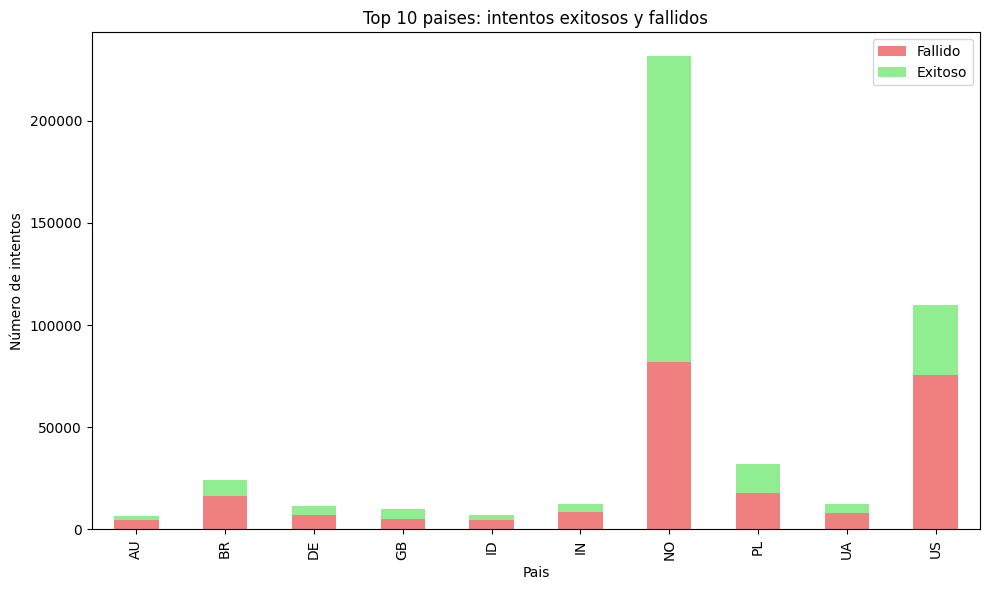

In [22]:
top_10_countries = df['Country'].value_counts().head(10).index
df_top_10 = df[df['Country'].isin(top_10_countries)]

city_counts = df_top_10.groupby(['Country', 'Login Successful']).size().unstack(fill_value=0)

city_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

plt.title('Top 10 paises: intentos exitosos y fallidos')
plt.xlabel('Pais')
plt.ylabel('Número de intentos')
plt.xticks(rotation=90)
plt.legend(['Fallido', 'Exitoso'])
plt.tight_layout()
plt.show()

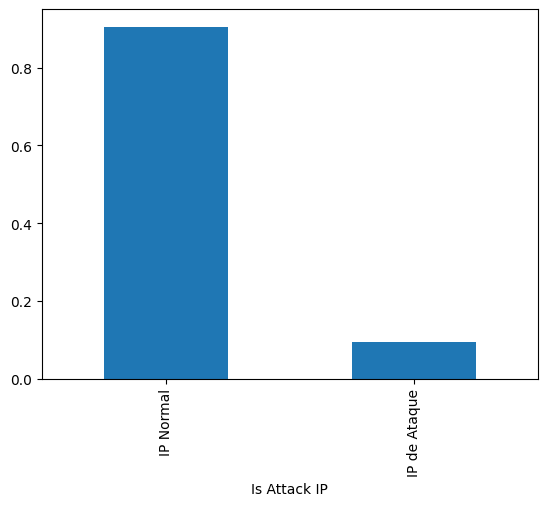

In [23]:
attack_counts = df['Is Attack IP'].map({True: 'IP de Ataque', False: 'IP Normal'}).value_counts(normalize=True).plot(
    kind='bar')

<Axes: xlabel='IP de Ataque'>

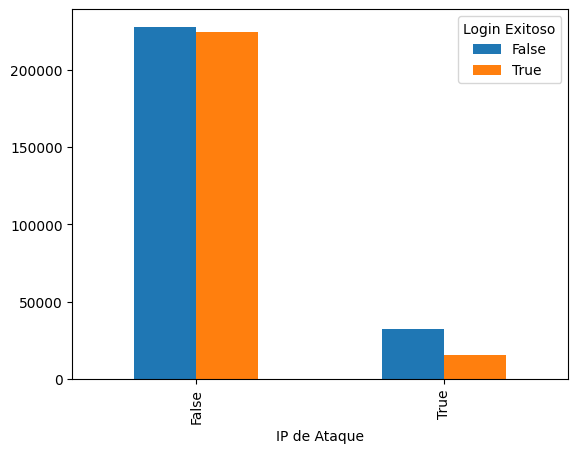

In [24]:
confusion_matrix = pd.crosstab(df['Is Attack IP'], df['Login Successful'], rownames=['IP de Ataque'],
                               colnames=['Login Exitoso'])

confusion_matrix.plot(kind='bar')

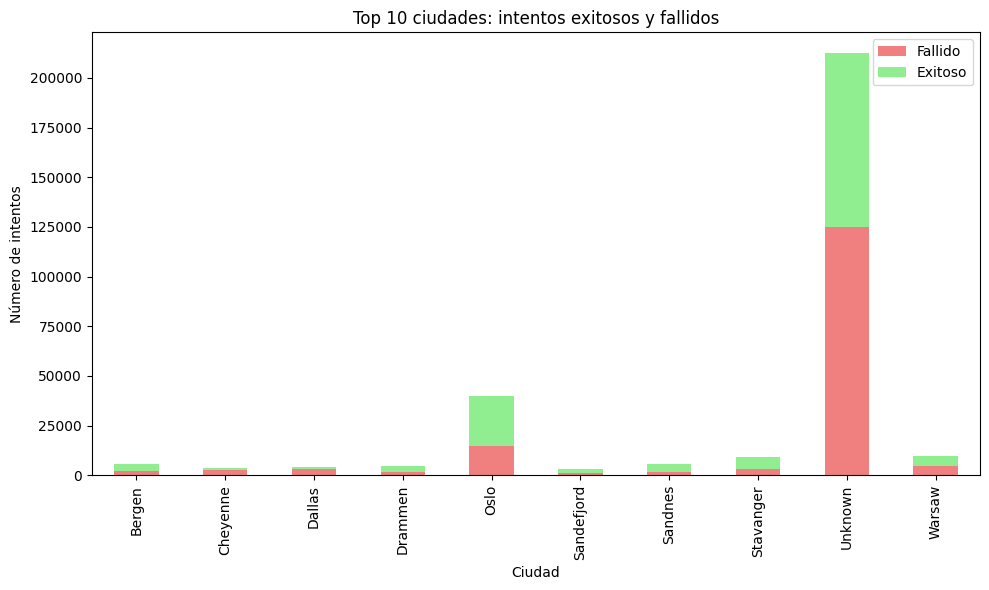

In [25]:
top_10_cities = df['City'].value_counts().head(10).index
df_top_10 = df[df['City'].isin(top_10_cities)]

city_counts = df_top_10.groupby(['City', 'Login Successful']).size().unstack(fill_value=0)

city_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

plt.title('Top 10 ciudades: intentos exitosos y fallidos')
plt.xlabel('Ciudad')
plt.ylabel('Número de intentos')
plt.xticks(rotation=90)
plt.legend(['Fallido', 'Exitoso'])
plt.tight_layout()
plt.show()

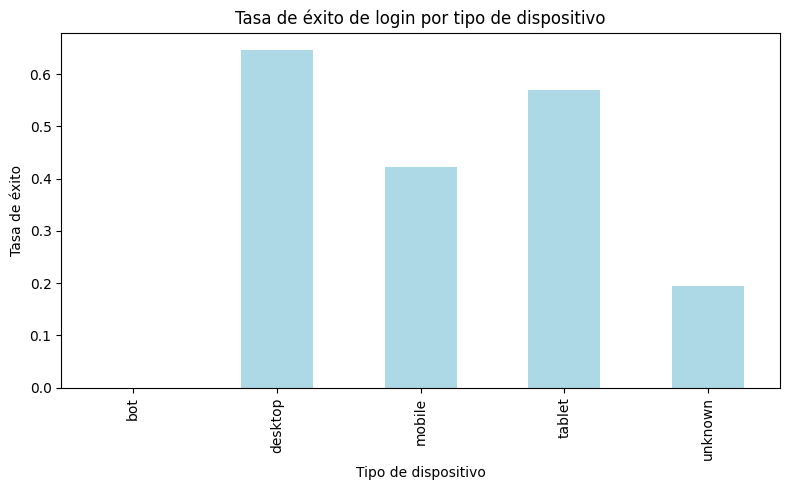

In [26]:
device_success = df.groupby(['Device Type', 'Login Successful']).size().unstack(fill_value=0)

device_success['Tasa de Éxito'] = device_success[True] / (device_success[True] + device_success[False])

plt.figure(figsize=(8, 5))
device_success['Tasa de Éxito'].plot(kind='bar', color='lightblue')

plt.title('Tasa de éxito de login por tipo de dispositivo')
plt.xlabel('Tipo de dispositivo')
plt.ylabel('Tasa de éxito')
plt.tight_layout()
plt.show()

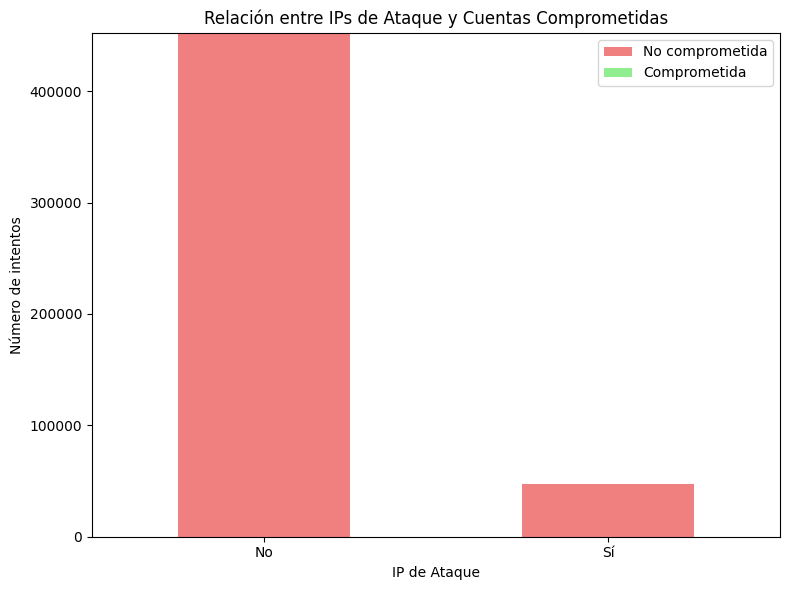

In [27]:
cross_tab = pd.crosstab([df['Is Attack IP']], [df['Is Account Takeover']],
                        rownames=['IP de Ataque'], colnames=['Cuenta Comprometida'])

cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'lightgreen'])

plt.title('Relación entre IPs de Ataque y Cuentas Comprometidas')
plt.xlabel('IP de Ataque')
plt.ylabel('Número de intentos')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.legend(['No comprometida', 'Comprometida'])
plt.tight_layout()
plt.show()

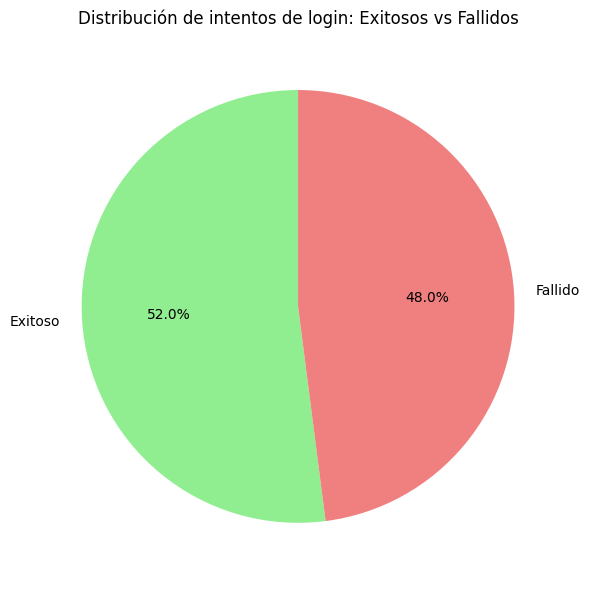

In [28]:
login_success_counts = df['Login Successful'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    login_success_counts.values,
    labels=['Exitoso', 'Fallido'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral']
)

plt.title('Distribución de intentos de login: Exitosos vs Fallidos')
plt.axis('equal')
plt.tight_layout()
plt.show()

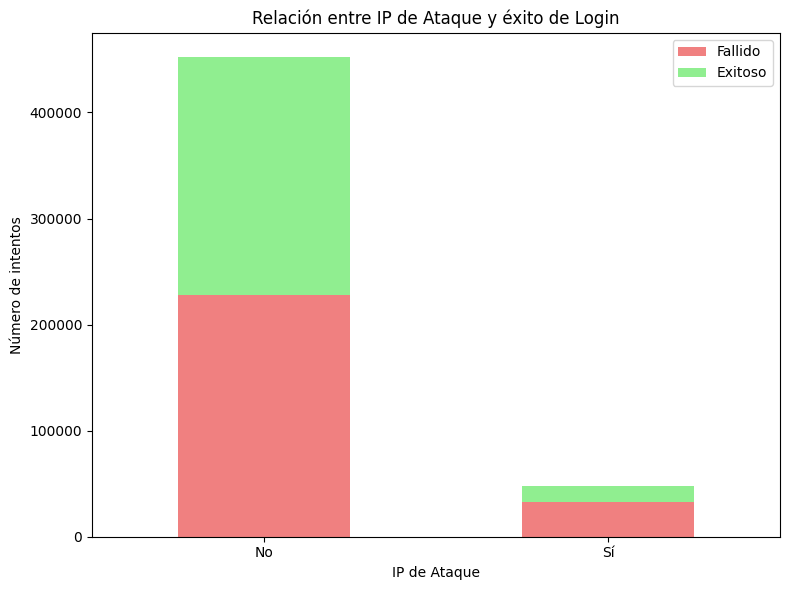

In [29]:
attack_success_cross = pd.crosstab(df['Is Attack IP'], df['Login Successful'],
                                   rownames=['IP de Ataque'], colnames=['Login Exitoso'])

attack_success_cross.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'lightgreen'])

# 3) Títulos y ejes
plt.title('Relación entre IP de Ataque y éxito de Login')
plt.xlabel('IP de Ataque')
plt.ylabel('Número de intentos')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.legend(['Fallido', 'Exitoso'])
plt.tight_layout()
plt.show()


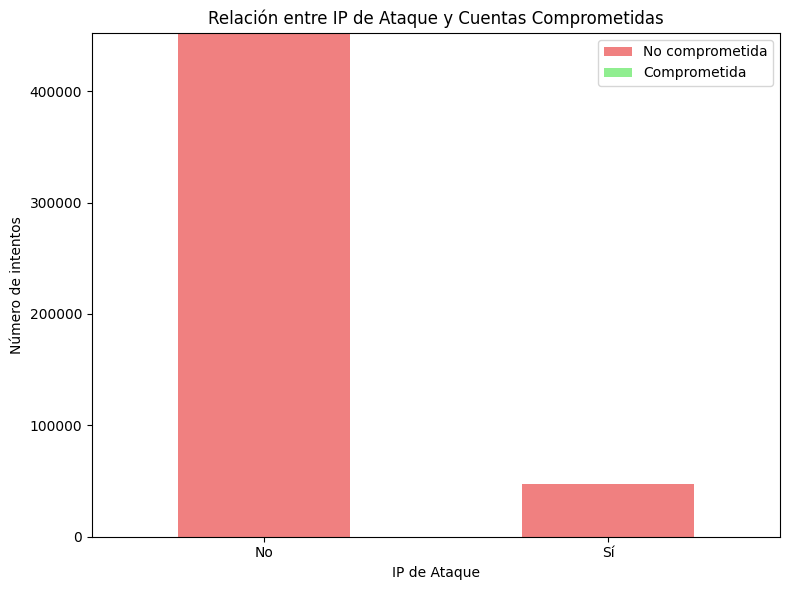

In [30]:
attack_takeover_cross = pd.crosstab(df['Is Attack IP'], df['Is Account Takeover'],
                                    rownames=['IP de Ataque'], colnames=['Cuenta Comprometida'])

attack_takeover_cross.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'lightgreen'])

plt.title('Relación entre IP de Ataque y Cuentas Comprometidas')
plt.xlabel('IP de Ataque')
plt.ylabel('Número de intentos')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.legend(['No comprometida', 'Comprometida'])
plt.tight_layout()
plt.show()


# 6. Transformación de datos, strings a numéricos

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in categorical_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes 

# 7. Machine Learning

In [32]:
X = df.drop(["Login Successful"], axis=1)
Y = df["Login Successful"]

## 7.1 Arbol de Decisión
> Spoiler: Este proceso de ML no es el mas adecuado para este dataset, el porcentaje de aciertos obtenidos es bajo-regular

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=110, stratify=Y)

In [70]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, Y_train)

predictions_dt = dt.predict(X_test)

In [71]:
accuracy = accuracy_score(Y_test, predictions_dt)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.78%


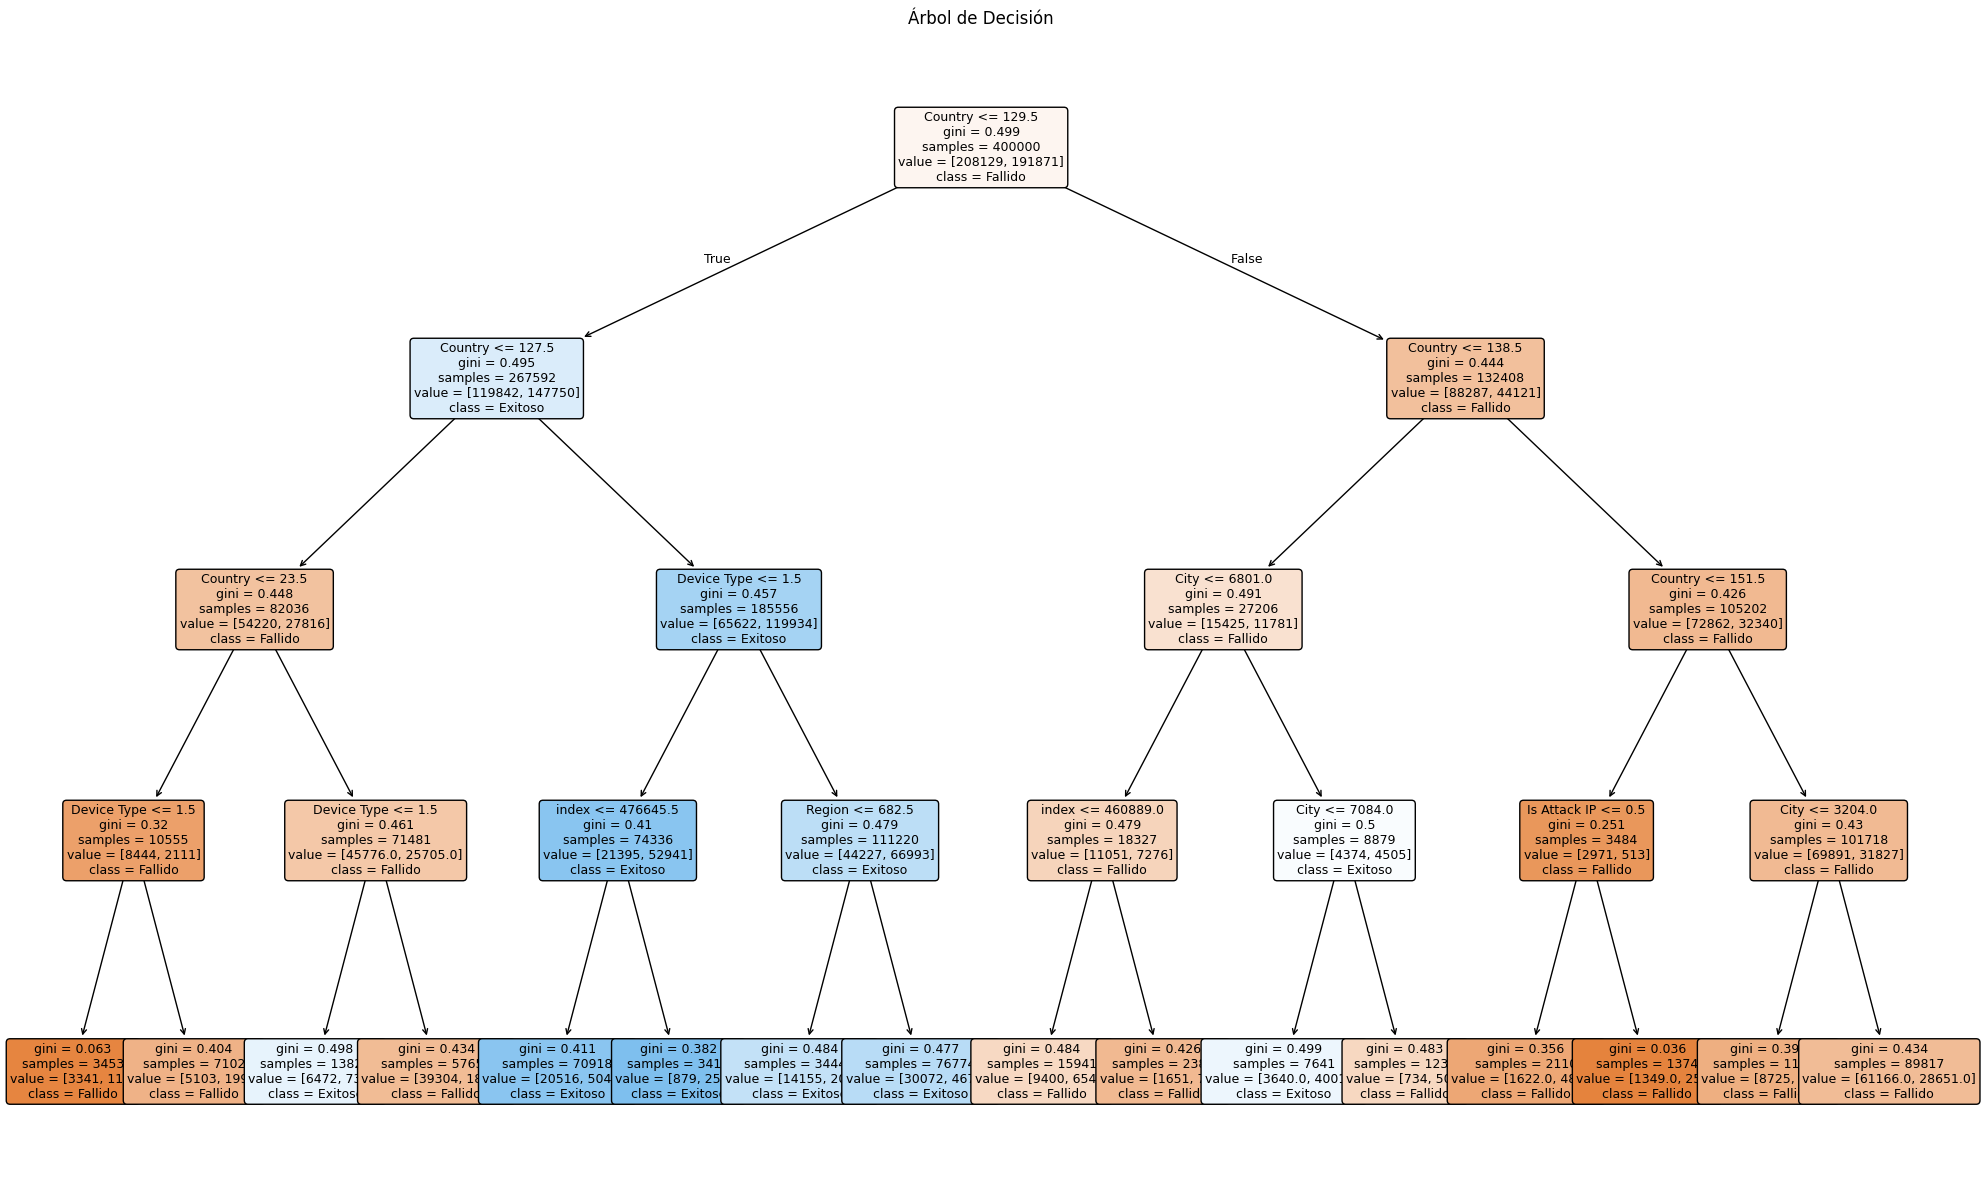

In [72]:
plt.figure(figsize=(25, 15))

plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Fallido', 'Exitoso'], rounded=True, max_depth=4, fontsize=9)
plt.title('Árbol de Decisión')
plt.show()

# 7.2 Random Forest

Esto puede tardar un poco, dependiendo de la velocidad de tu equipo, puedes ajustar `n_estimators` si es necesario

In [73]:
mrf = RandomForestClassifier(n_estimators=10, random_state=110).fit(X, Y)
y_pred = mrf.predict(X_test)

In [74]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.94%


Este proceso de ML fue mas adecuado para este dataset, el porcentaje de aciertos obtenidos es alto

## 7.3 Isolation Forest

In [75]:
features = df[['Country', 'Region', 'City', 'Device Type', 'Is Attack IP']].copy()
target = df['Is Account Takeover'].astype(int)

categorical_cols = ['Country', 'Region', 'City', 'Device Type']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col].astype(str))
    label_encoders[col] = le

In [76]:
modelIF = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
modelIF.fit(X_train)
y_pred = modelIF.predict(X_test)

In [77]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 46.27%
